### Scroll Down Below to start from Exercise 8.04

In [1]:
# Removes Warnings
import warnings
warnings.filterwarnings('ignore')
#import the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the data using pandas

In [2]:
data= pd.read_csv('Churn_Modelling.csv')
data.head(5)

,CustomerId,CredRate,Geography,Gender,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
0,15634602,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0


In [3]:
len(data)

10000

In [4]:
data.shape

(10000, 12)

## Scrubbing the data

In [5]:
data.isnull().values.any()

True

In [6]:
#It seems we have some missing values now let us explore what are the columns
#having missing values

data.isnull().any()

## it seems that we have missing values in Gender,age and EstimatedSalary

CustomerId         False
CredRate           False
Geography          False
Gender              True
Age                 True
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary     True
Exited             False
dtype: bool

In [7]:
data[["EstimatedSalary","Age"]].describe()


,EstimatedSalary,Age
count,9996.000000,9994.000000
mean,100074.744083,38.925255
std,57515.774555,10.489248
min,11.580000,18.000000
25%,50974.077500,32.000000
50%,100168.240000,37.000000
75%,149388.247500,44.000000
max,199992.480000,92.000000


In [8]:
data.describe()
#### It seems that HasCrCard has value as 0 and 1 hence needs to be changed to category

,CustomerId,CredRate,Age,Tenure,Balance,Prod Number,HasCrCard,ActMem,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,9994.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,9996.000000,10000.000000
mean,1.569094e+07,650.528800,38.925255,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,7.193619e+04,96.653299,10.489248,2.892174,62397.405202,0.581654,0.45584,0.499797,57515.774555,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,50974.077500,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100168.240000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
data['HasCrCard'].value_counts()

1    7055
0    2945
Name: HasCrCard, dtype: int64

In [10]:
## No of missing Values present
data.isnull().sum()

CustomerId         0
CredRate           0
Geography          0
Gender             4
Age                6
Tenure             0
Balance            0
Prod Number        0
HasCrCard          0
ActMem             0
EstimatedSalary    4
Exited             0
dtype: int64

In [11]:
## Percentage of missing Values present
round(data.isnull().sum()/len(data)*100,2)

CustomerId         0.00
CredRate           0.00
Geography          0.00
Gender             0.04
Age                0.06
Tenure             0.00
Balance            0.00
Prod Number        0.00
HasCrCard          0.00
ActMem             0.00
EstimatedSalary    0.04
Exited             0.00
dtype: float64

In [12]:
## Checking the datatype of the missing columns
data[["Gender","Age","EstimatedSalary"]].dtypes

Gender              object
Age                float64
EstimatedSalary    float64
dtype: object

### There are three ways to impute missing values:
    1. Droping the missing values rows
    2. Fill missing values with a test stastics
    3. Predict the missing values using ML algorithm

In [13]:
### Filling the missing value with the mean of the values
mean_value=data['EstimatedSalary'].mean()
data['EstimatedSalary']=data['EstimatedSalary'].fillna(mean_value)

In [14]:
data['Gender'].value_counts()

Male      5453
Female    4543
Name: Gender, dtype: int64

In [15]:
### Since it seems that the Gender is a categorical field therefore
### we will fill the values with the 0 since its the most occuring number

data['Gender']=data['Gender'].fillna(data['Gender'].value_counts().idxmax())

In [16]:
mode_value=data['Age'].mode()
data['Age']=data['Age'].fillna(mode_value[0])

In [17]:
##checking for any missing values

data.isnull().any()

CustomerId         False
CredRate           False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
Prod Number        False
HasCrCard          False
ActMem             False
EstimatedSalary    False
Exited             False
dtype: bool

### Renaming the columns

In [18]:
# We would want to rename some of the columns

data = data.rename(columns={
                        'CredRate': 'CreditScore',
                        'ActMem' : 'IsActiveMember',
                        'Prod Number': 'NumOfProducts',
                        'Exited':'Churn'
                        })
data.columns

Index(['CustomerId', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Churn'],
      dtype='object')

### We would also like to move the churn columnn to the extreme right and drop the customer ID

In [19]:
data.drop(labels=['CustomerId'], axis=1,inplace = True)

In [20]:
column_churn = data['Churn']
data.drop(labels=['Churn'], axis=1,inplace = True)
data.insert(len(data.columns), 'Churn', column_churn.values)

In [21]:
data.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Churn'],
      dtype='object')

### Changing the data type

In [22]:
# Convert these variables into categorical variables
data["Geography"] = data["Geography"].astype('category')
data["Gender"] = data["Gender"].astype('category')


In [23]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Churn                 int64
dtype: object

# Exploring the data

## Statistical Overview

In [24]:
data['Churn'].value_counts(0)

0    7963
1    2037
Name: Churn, dtype: int64

In [25]:
data['Churn'].value_counts(1)*100

0    79.63
1    20.37
Name: Churn, dtype: float64

In [26]:
data.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.924100,5.012800,76485.889288,1.530200,0.70550,0.515100,100074.744083,0.203700
std,96.653299,10.486207,2.892174,62397.405202,0.581654,0.45584,0.499797,57504.269099,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100134.325000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149382.097500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [27]:
summary_churn = data.groupby('Churn')
summary_churn.mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Churn,,,,,,,,
0,651.853196,37.411277,5.033279,72745.296779,1.544267,0.707146,0.554565,99718.932023
1,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


In [28]:
summary_churn.median()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Churn,,,,,,,,
0,653,36.0,5,92072.68,2,1,1,99645.04
1,646,45.0,5,109349.29,1,1,0,102460.84


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
CreditScore,1.000000,-0.004179,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001352,-0.027094
Age,-0.004179,1.000000,-0.009996,0.028141,-0.030590,-0.011707,0.085278,-0.007215,0.285256
Tenure,0.000842,-0.009996,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007407,-0.014001
Balance,0.006268,0.028141,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.013129,0.118533
NumOfProducts,0.012238,-0.030590,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014132,-0.047820
HasCrCard,-0.005458,-0.011707,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009935,-0.007138
IsActiveMember,0.025651,0.085278,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011471,-0.156128
EstimatedSalary,-0.001352,-0.007215,0.007407,0.013129,0.014132,-0.009935,-0.011471,1.000000,0.012234
Churn,-0.027094,0.285256,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012234,1.000000


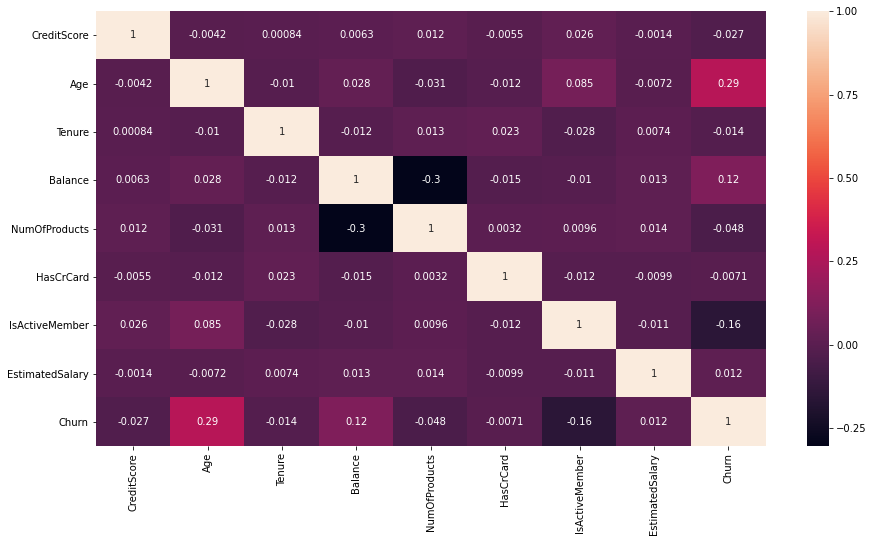

In [29]:
corr = data.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,annot=True)
corr

## Visualization

Text(0, 0.5, 'No of Customers')

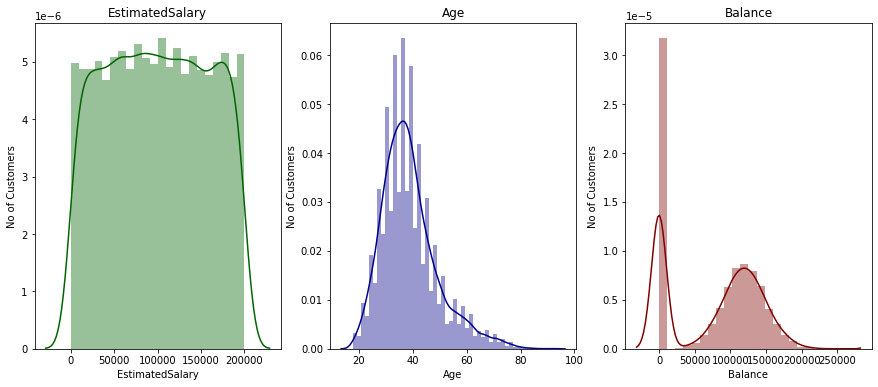

In [30]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

sns.distplot(data.EstimatedSalary, kde=True, color="darkgreen", ax=axes[0]).set_title('EstimatedSalary')
axes[0].set_ylabel('No of Customers')


sns.distplot(data.Age, kde=True, color="darkblue", ax=axes[1]).set_title('Age')
axes[1].set_ylabel('No of Customers')


sns.distplot(data.Balance, kde=True, color="maroon", ax=axes[2]).set_title('Balance')
axes[2].set_ylabel('No of Customers')


Text(0.5, 1.0, 'Customer Churn Distribution by Gender')

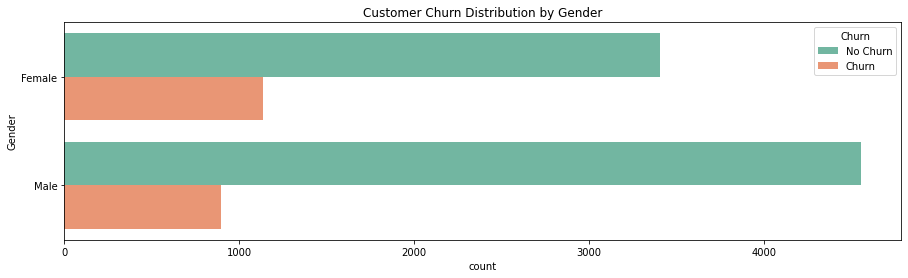

In [31]:
plt.figure(figsize=(15,4))
p=sns.countplot(y="Gender", hue='Churn', data=data,palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Churn Distribution by Gender')

Text(0.5, 1.0, 'Customer Geography Distribution')

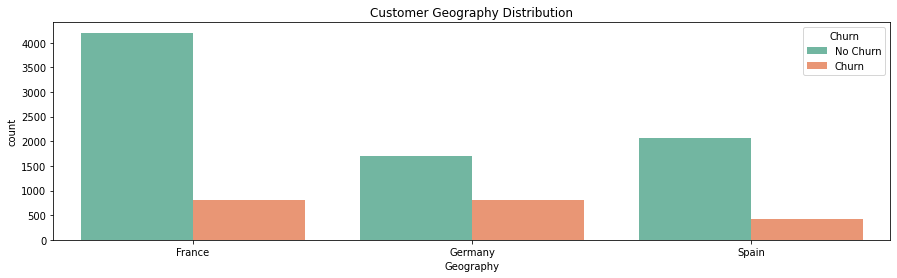

In [32]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='Geography', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Geography Distribution')

Text(0.5, 1.0, 'Customer Distribution by Product')

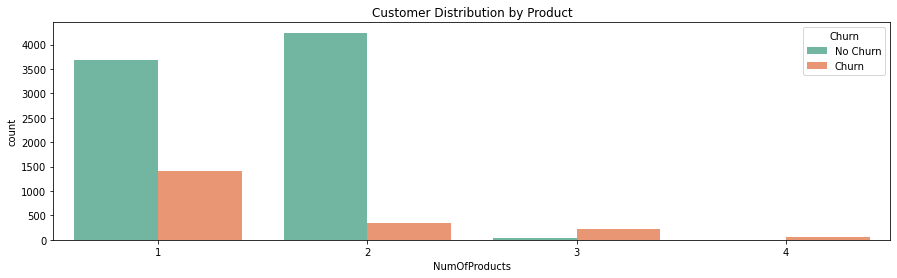

In [33]:
plt.figure(figsize=(15,4))
p=sns.countplot(x='NumOfProducts', hue='Churn',data=data, palette="Set2")
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('Customer Distribution by Product')

Text(0.5, 1.0, 'Customer Age - churn vs no churn')

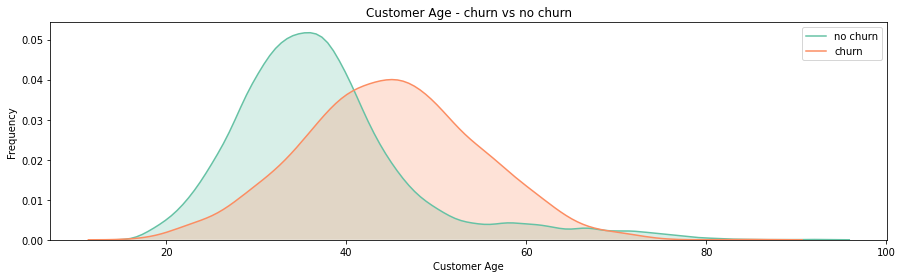

In [34]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Age'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Age'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Age', ylabel='Frequency')
plt.title('Customer Age - churn vs no churn')

Text(0.5, 1.0, 'Customer Balance - churn vs no churn')

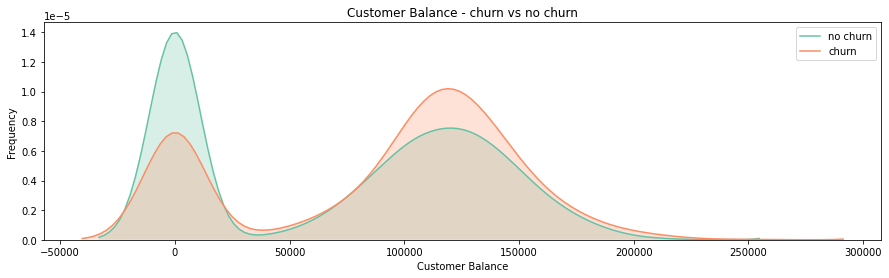

In [35]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'Balance'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'Balance'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='Customer Balance', ylabel='Frequency')
plt.title('Customer Balance - churn vs no churn')

Text(0.5, 1.0, 'Customer CreditScore - churn vs no churn')

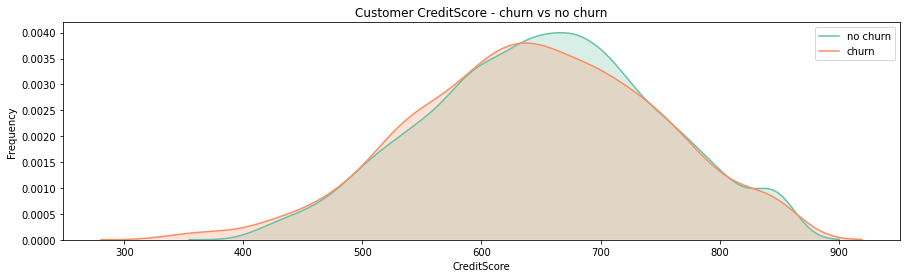

In [36]:
plt.figure(figsize=(15,4))
ax=sns.kdeplot(data.loc[(data['Churn'] == 0),'CreditScore'] , color=sns.color_palette("Set2")[0],shade=True,label='no churn')
ax=sns.kdeplot(data.loc[(data['Churn'] == 1),'CreditScore'] , color=sns.color_palette("Set2")[1],shade=True, label='churn')
ax.set(xlabel='CreditScore', ylabel='Frequency')
plt.title('Customer CreditScore - churn vs no churn')

Text(0.5, 1.0, 'No of Product VS Balance')

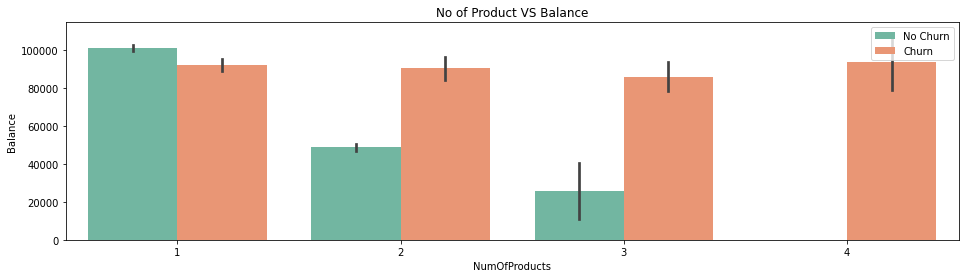

In [37]:
plt.figure(figsize=(16,4))

p=sns.barplot(x='NumOfProducts',y='Balance',hue='Churn',data=data, palette="Set2")
p.legend(loc='upper right')
legend = p.get_legend()
legend_txt = legend.texts
legend_txt[0].set_text("No Churn")
legend_txt[1].set_text("Churn")
p.set_title('No of Product VS Balance')

## Feature selection

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
data.dtypes

CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
IsActiveMember        int64
EstimatedSalary     float64
Churn                 int64
dtype: object

In [40]:
### Encoding the categorical variables
data["Geography"] = data["Geography"].astype('category').cat.codes
data["Gender"] = data["Gender"].astype('category').cat.codes

In [41]:
target = 'Churn'
X = data.drop('Churn', axis=1)
y=data[target]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15, random_state=123, stratify=y)

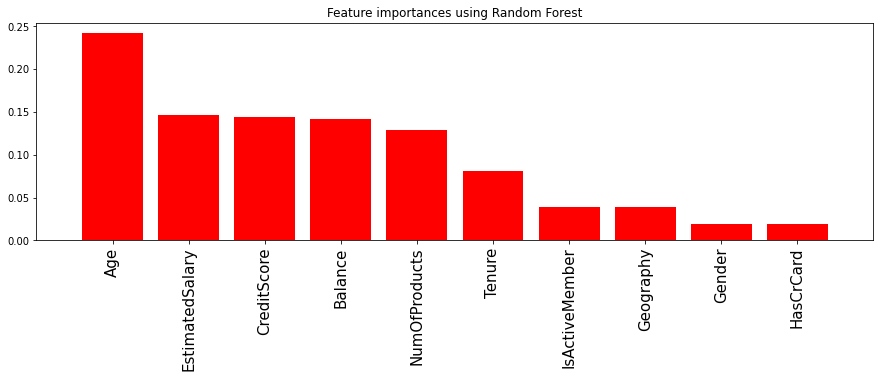

In [42]:
forest=RandomForestClassifier(n_estimators=500,random_state=1)

forest.fit(X_train,y_train)

importances=forest.feature_importances_
features = data.drop(['Churn'],axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r",  align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation='vertical',fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Model Fitting

In [43]:
### From the feature selection let us take only the top 6 features

import statsmodels.api as sm
top5_features = ['Age','EstimatedSalary','CreditScore','Balance','NumOfProducts']
logReg = sm.Logit(y_train, X_train[top5_features])
logistic_regression = logReg.fit()

Optimization terminated successfully.
         Current function value: 0.472882
         Iterations 6


In [44]:
logistic_regression.summary
logistic_regression.params

Age                0.048335
EstimatedSalary   -0.000001
CreditScore       -0.004470
Balance            0.000003
NumOfProducts     -0.361678
dtype: float64

In [45]:
# Create function to compute coefficients
coef = logistic_regression.params
def y (coef,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts) : 
    return coef[0]*Age+ coef[1]*EstimatedSalary+coef[2]*CreditScore+coef[1]*Balance+coef[2]*NumOfProducts

In [46]:
import numpy as np

#A customer having below attributes
#Age: 50
#EstimatedSalary: 100,000 
#CreditScore: 600
#Balance: 100,000
#NumOfProducts: 2
#would have 38% chance of churn

y1 = y(coef, 50, 100000, 600,100000,2)
p = np.exp(y1) / (1+np.exp(y1))
p

0.3823017864835242

# Fitting Logistic Regression using Scikit Learn

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
clf = LogisticRegression(random_state=0, solver='lbfgs').fit(X_train[top5_features], y_train)

In [49]:
clf.predict(X_test[top5_features])


array([0, 0, 0, ..., 0, 0, 0])

In [50]:
clf.predict_proba(X_test[top5_features])

array([[0.61565033, 0.38434967],
       [0.76717157, 0.23282843],
       [0.78137389, 0.21862611],
       ...,
       [0.552548  , 0.447452  ],
       [0.85311964, 0.14688036],
       [0.75851722, 0.24148278]])

In [51]:
clf.score(X_test[top5_features], y_test)

0.79

## Exercise 8.04

# Performing standardization

In [52]:
from sklearn import preprocessing

In [53]:
X_train[top5_features].head()

,Age,EstimatedSalary,CreditScore,Balance,NumOfProducts
490,29.0,196356.17,591,97541.24,1
5555,39.0,164018.98,614,0.00,2
9235,27.0,80587.27,462,176913.52,1
6594,40.0,57817.84,747,0.00,1
6671,49.0,187811.71,677,0.00,2


In [54]:
scaler = preprocessing.StandardScaler().fit(X_train[top5_features])

In [55]:
scaler.mean_

array([3.89098824e+01, 1.00183902e+05, 6.49955882e+02, 7.61412119e+04,
       1.52882353e+00])

In [56]:
scaler.scale_    

array([1.03706201e+01, 5.74453373e+04, 9.64815072e+01, 6.24292333e+04,
       5.80460085e-01])

In [57]:
X_train_scalar=scaler.transform(X_train[top5_features])

In [58]:
X_train_scalar

array([[-0.95557279,  1.67415272, -0.61105889,  0.34278858, -0.91104202],
       [ 0.00868971,  1.11123166, -0.37267123, -1.21964035,  0.81172932],
       [-1.14842529, -0.3411353 , -1.94810268,  1.61418462, -0.91104202],
       ...,
       [-0.56986779, -0.72635385,  0.36322108, -1.21964035, -0.91104202],
       [-0.37701529, -1.47154105,  0.91254915, -1.21964035, -0.91104202],
       [-0.08773654, -0.55862971, -1.11892823, -0.16336821, -0.91104202]])

In [59]:
X_test_scalar=scaler.transform(X_test[top5_features])  

## Exercise 8.05

# Performing Scaling

In [60]:
min_max = preprocessing.MinMaxScaler().fit(X_train[top5_features])

In [61]:
min_max.min_

array([-2.43243243e-01, -5.79055300e-05, -7.00000000e-01,  0.00000000e+00,
       -3.33333333e-01])

In [62]:
min_max.scale_    

array([1.35135135e-02, 5.00047755e-06, 2.00000000e-03, 3.98568200e-06,
       3.33333333e-01])

In [63]:
X_train_min_max=min_max.transform(X_train[top5_features])

In [64]:
X_test_min_max=min_max.transform(X_test[top5_features])  